In [1]:
!pip install tensorflow numpy matplotlib

In [4]:
import os
import shutil
import random

def split_dataset(source_dir, train_dir, val_dir, split_ratio=0.8):
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)

    for category in os.listdir(source_dir):
        category_path = os.path.join(source_dir, category)
        if os.path.isdir(category_path):
            os.makedirs(os.path.join(train_dir, category), exist_ok=True)
            os.makedirs(os.path.join(val_dir, category), exist_ok=True)

            images = os.listdir(category_path)
            random.shuffle(images)

            split_index = int(len(images) * split_ratio)
            train_images = images[:split_index]
            val_images = images[split_index:]

            for image in train_images:
                shutil.copy(os.path.join(category_path, image),
                            os.path.join(train_dir, category, image))
            for image in val_images:
                shutil.copy(os.path.join(category_path, image),
                            os.path.join(val_dir, category, image))

# Paths for dataset
source_directory = "C:/Users/Supriya/Downloads/6cat_data/Garbage classification_6 cgt/data"
train_directory = "C:/Users/Supriya/Downloads/6cat_data/Garbage classification_6 cgt/train"
validation_directory = "C:/Users/Supriya/Downloads/6cat_data/Garbage classification_6 cgt/valid"

# Split the dataset
split_dataset(source_directory, train_directory, validation_directory)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [6]:
# Set up paths
train_dir = "C:/Users/Supriya/Downloads/6cat_data/Garbage classification_6 cgt/train"
validation_dir = "C:/Users/Supriya/Downloads/6cat_data/Garbage classification_6 cgt/valid"

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Adjust based on your dataset
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


In [7]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(6, activation='softmax')  # Assuming 6 categories
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Supriya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50  # Adjust based on your needs
)

Epoch 1/50


C:\Users\Supriya\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.2073 - loss: 1.7569 - val_accuracy: 0.3167 - val_loss: 1.5952
Epoch 2/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 24s 394ms/step - accuracy: 0.3750 - loss: 1.5186

C:\Users\Supriya\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3750 - loss: 1.5186 - val_accuracy: 0.2857 - val_loss: 1.6703
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 54s 798ms/step - accuracy: 0.3451 - loss: 1.5709 - val_accuracy: 0.3833 - val_loss: 1.4798
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3438 - loss: 1.5819 - val_accuracy: 0.3929 - val_loss: 1.5827
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 716ms/step - accuracy: 0.4175 - loss: 1.4056 - val_accuracy: 0.4938 - val_loss: 1.3134
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3750 - loss: 1.2960 - val_accuracy: 0.3214 - val_loss: 1.6372
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 783ms/step - accuracy: 0.4354 - loss: 1.3664 - val_accuracy: 0.4750 - val_loss: 1.2980
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4688 - loss: 1.3001 - val_accuracy: 0.5000 - val_loss: 1.2978
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 783ms/step - accuracy: 0.4462 - loss: 1.3339 - val_accuracy: 0.5208 - val_loss

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy*100:.2f}%')


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - accuracy: 0.7035 - loss: 0.8411
Validation accuracy: 68.70%


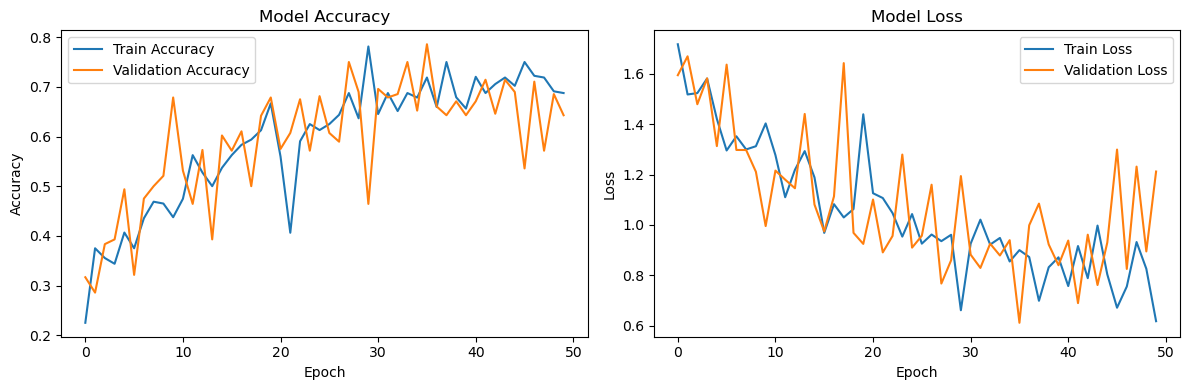

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('C:/Users/Supriya/trash_model.h5')

In [ ]:
# Load the model from the SavedModel format
model = tf.keras.models.load_model("C:/Users/Supriya/trash_model.h5")

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model (if not already loaded)
# model = models.load_model('path_to_your_model.h5')  # Uncomment if you've saved the model

# Define class names
class_names = ['Trash', 'Plastic', 'Paper','Metal' ,'Glass', 'Cardboard']

def classify_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust target size based on your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale like during training

    # Predict class probabilities
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class_index]  # Get the class name

    # Show the image and prediction result
    plt.imshow(img)
    plt.title(f'Predicted class: {predicted_class_name}')  # Display class name
    plt.axis('off')  # Hide axis
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


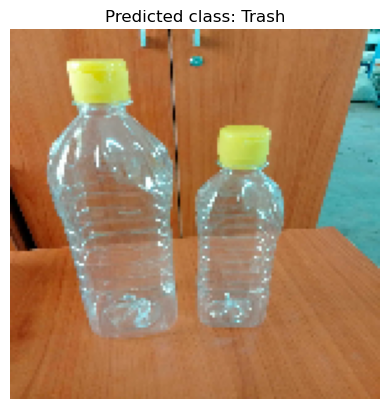

In [21]:
# Input image path
image_path = "C:/Users/Supriya/Downloads/platic bottle.jpg"
classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


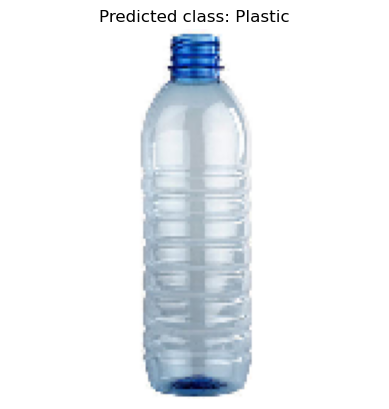

In [22]:
# Input image path
image_path = "C:/Users/Supriya/Downloads/bottle.jpg"
classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


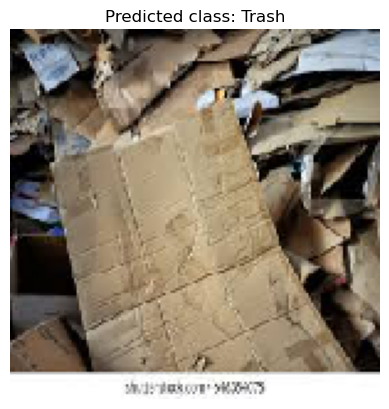

In [23]:
# Input image path
image_path = "C:/Users/Supriya/Downloads/card.jpg"
classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


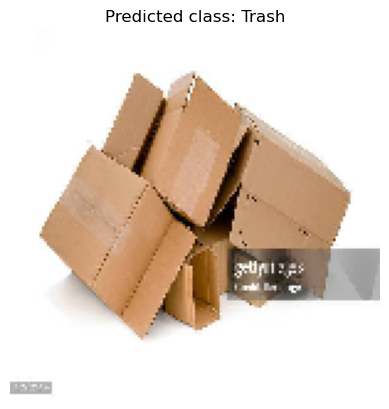

In [19]:
# Input image path
image_path = "C:/Users/Supriya/Downloads/card2.jpg"
classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


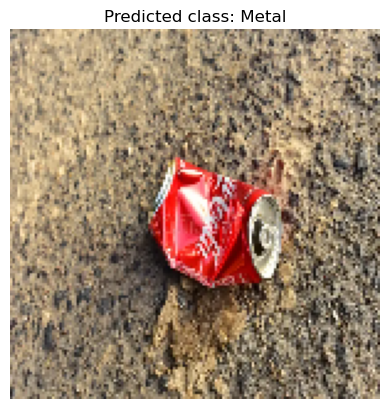

In [20]:
# Input image path
image_path = "C:/Users/Supriya/Downloads/coke.jpg"
classify_image(image_path)